In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [8]:
# Extract year, month, and day as features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df = df.drop(['Date'],axis=1)

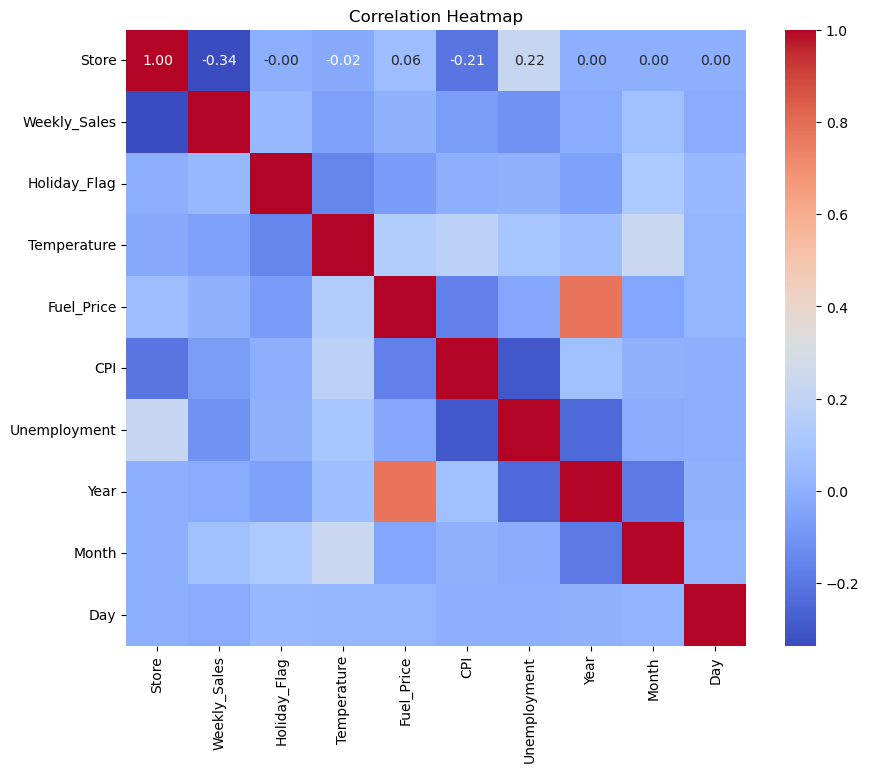

In [10]:
# Explore relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

MODEL BUILDING AND EVALUATION

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
x = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

In [13]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


RANDOM FOREST REFRESSOR

In [27]:
# Train a RandomForestRegressor model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
#Make Predictions
y_pred = model.predict(x_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 13504777637.656548


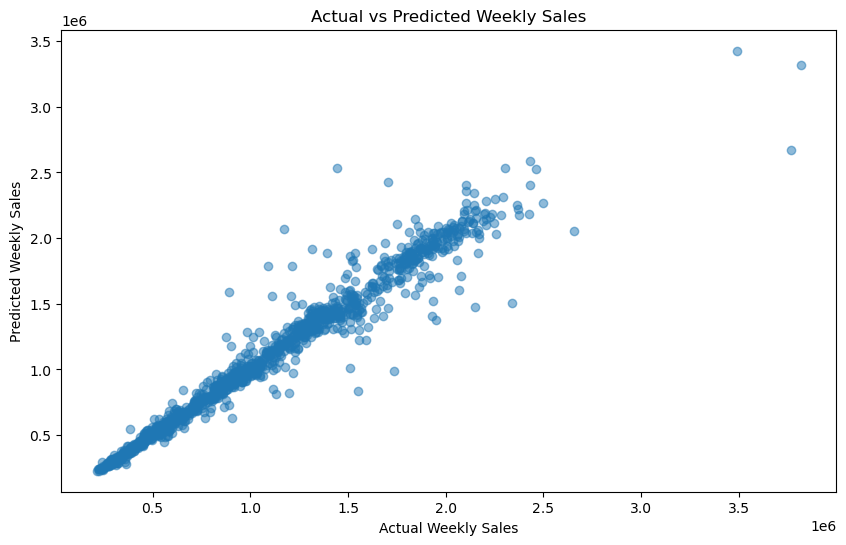

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.show()

In [41]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search_RF = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')


In [42]:
# Fit the grid search to the data
grid_search_RF.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [44]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


In [45]:
# Make predictions with the best model
best_rf_predictions = best_rf_model.predict(x_test)

# Evaluate the best model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
print(f"Best Random Forest Regressor Mean Squared Error: {best_rf_mse}")
print("Best Parameters:", best_params)

Best Random Forest Regressor Mean Squared Error: 13077345400.630793
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_predictions = linear_model.predict(x_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

Linear Regression Mean Squared Error: 272064071370.04926


SUPPORT VECTOR REGRESSOR

In [ ]:
from sklearn.svm import SVR

In [35]:
# Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
svr_predictions = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f"Support Vector Regressor Mean Squared Error: {svr_mse}")

Support Vector Regressor Mean Squared Error: 331329613652.9631


GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)
gb_predictions = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Regressor Mean Squared Error: {gb_mse}")


Gradient Boosting Regressor Mean Squared Error: 30648654654.608162


In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')


In [37]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [38]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

In [40]:
# Make predictions with the best model
best_gb_predictions = best_gb_model.predict(x_test)

# Evaluate the best model
best_gb_mse = mean_squared_error(y_test, best_gb_predictions)
print(f"Best Gradient Boosting Regressor Mean Squared Error: {best_gb_mse}")
print("Best Parameters:", best_params)

Best Gradient Boosting Regressor Mean Squared Error: 7878959345.368632
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
